# Исследование рынка компьютерных игр

**Цель:** выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Исходные данные:** Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Считаем, что сейчас декабрь 2016 года и мы планируем кампанию на 2017-й. Необходимо отработать принцип работы с данными. Неважно, прогноз продаж на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Примечание:** Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## 1 Изучение данных из файла 

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

# формат по умолчанию для float
pd.options.display.float_format = '{:.2f}'.format

Откроем файлы с данными и изучим общую информацию:

In [2]:
df = pd.read_csv('/Users/olgakozlova/Desktop/Практикум/В портфолио/5 Сборный проект 1 - готово, можно улучшать/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# просмотр общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица представлена 11 столбцами и 16715 строками. Встречаются типы данных: float - 6 раз, object - 5 раз. 

Согласно документации к данным: 
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В столбцах разное количество строк, что говорит о наличии пропусков. 

In [4]:
# числовое представление данных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.00,2006.48,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
NA_sales,16715.00,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,16715.00,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,16715.00,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,16715.00,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,8137.00,68.97,13.94,13.00,60.00,71.00,79.00,98.00


### 1.2 Выводы

Каждая строка таблицы дает информацию о продажах конкретной компьютерной игры, оценках пользователей и экспертов, жанрах и платформах. В таблице собрана информация с 1980 до 2016 год.

Предварительно можно считать, что данных достаточно для исследовательского анализа, однако присутствуют пропуски, от которых необходимо избавиться.

## 2 Предобработка данных

### 2.1 Переименование столбцов

Приведем заголовки столбцов к змеиному регистру:

In [5]:
print(df.columns)

# приведение заголовков столбцов к нижнему регистру
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

К нижнему регистру необходимо было привести заголовки всех столбцов датафрейма, поэтому был выбран атрибут columns, а не метод rename(). 

### 2.2 Обработка пропусков

Посмотрим на пропуски в данных: 

In [6]:
# подсчет пропусков
print(df.isna().sum())

# просмотр процента пропусков
df.isna().mean() * 100

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


name               0.01
platform           0.00
year_of_release    1.61
genre              0.01
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.32
user_score        40.09
rating            40.48
dtype: float64

В столбце *name* и *genre* обнаружено по 2 пропуска - по 0.01 %, которые к тому же соответствуют одинаковым двум строкам. Также в столбце *year_of_release* 269 пропущенных значений (1.61 %). Их удаление никак не повлияет на дальнейшее исследование:

In [7]:
# строки c name == NaN
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# удаление пропущенных значений из столбцов 'name', 'year_of_release', 'genre'
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace=True)

# количество оставшихся пропусков
df.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Посмотрим на значения, которые встречаются в столбах *critic_score* и *user_score*:

In [9]:
# уникальные значения в столбце 'оценка критиков'
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [10]:
# уникальные значения в столбце 'оценка пользователей'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбцах с количественными переменными *critic_score* и *user_score* обнаружено 8461 (51.32 %) и 6605 (40.09 %) пропущенных значений соответственно. Удаление такого количества пропусков негативно отразится на результатах корреляционного анализа и статистических тестов. Оставляем эти пропущенные значения без изменений.

In [11]:
# количество tbd в столбце 'user_score'
df[df['user_score'] == 'tbd']['user_score'].count()

2376

В столбце *user_score* встречается 2376 значений tbd (to be defined - предстоит определить). Заменим его на пропуски:

In [12]:
# замена tbd на nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

В столбце *rating* встречаются 6676 пропусков, поскольку значения в этом столбце категориальные, заменим пропуски на 'Не определен':

In [13]:
# уникальные значения и их встречаемость
print(df['rating'].value_counts()) 

# замена nan на 'Не определен'
df.loc[df['rating'].isna(), 'rating'] = 'Не определен'

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


Рейтинг компьютерных игр и подходящая им возрастная категория:

- «E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults")
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Поскольку рейтинг "Everyone" изначально носил название "Kids to Adults", 3 игры с рейтингом К-А можно объединить с играми из рейтинга Е:

In [14]:
# замена К-А на Е
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

# проверка после перемещения К-А в Е
df['rating'].value_counts()

Не определен    6676
E               3924
T               2905
M               1536
E10+            1393
EC                 8
AO                 1
RP                 1
Name: rating, dtype: int64

In [15]:
# оставшиеся пропуски
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### 2.3 Преобразование данных в нужные типы

Для проведения математических операций тип данных object столбца *user_score* изменим на float, для столбца *year_of_release* float на int:

In [16]:
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### 2.4 Суммарные продажи во всех регионах

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [17]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9804,McDROID,Wii,2011,Strategy,0.00,0.00,0.12,0.00,NaN,NaN,Не определен,0.12


In [18]:
# поиск полных дубликатов
df.duplicated().sum() 

0

### 2.5 Выводы

- названия всех столбцов приведены к нижнему регистру.

- для дальнейших математических преобразований тип данных столбца *user_score* изменен на float, столбца *year_of_release* на integer.

- в столбцах *name* и *genre* обнаружено по 2 пропуска (0.01 %), в *year_of_release* 269 пропущенных значений (1.61 %). Эти строки были удалены из-за их незначительного количества.

- обнаруженные пропущенные значения в столбцах *critic_score*, *user_score* составляют приблизительно от 40 до 52 % от всей таблицы, удаление такого количества строк негативно скажется на результатах коррреляционного анализа и статистических тестов, поэтому такие пропуски остались незаполненными. 

- также в столбце *user_score* встречается 2376 значений tbd, они были заменены на пропуски.

- в столбце *rating* 6676 пропусков заменимы на 'Не определен', так данные этого столбца категориальные. 3 игры с рейтингом К-А объединены с играми из рейтинга Е.

- посчитанны суммарные продажи во всех регионах.

- полные дубликаты не обнаружены.

## 3 Исследовательский анализ данных

### 3.1 Распределение компьютерных игр по годам

Посмотрим, сколько игр выпускалось в разные годы:

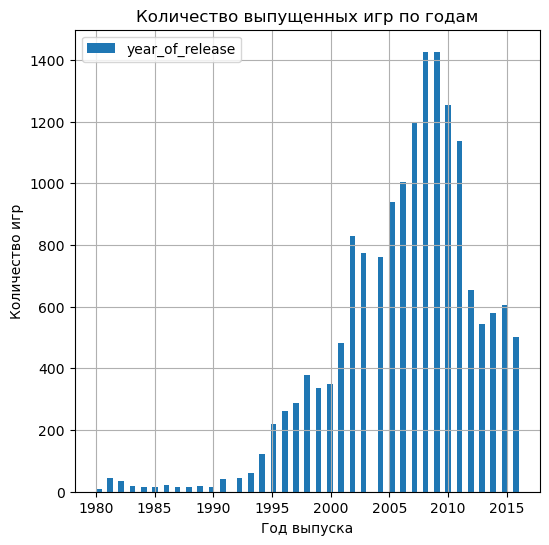

In [19]:
# сколько игр выпускалось в разные годы?
df.plot(
    kind = 'hist',
    y = 'year_of_release',
    bins = 75,
    figsize = (6, 6),
    grid = True,
    title = 'Количество выпущенных игр по годам'
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

In [20]:
# количество игр по годам
release_per_years = df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count').sort_values(by = 'total_sales', ascending = False)
release_per_years

,total_sales
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


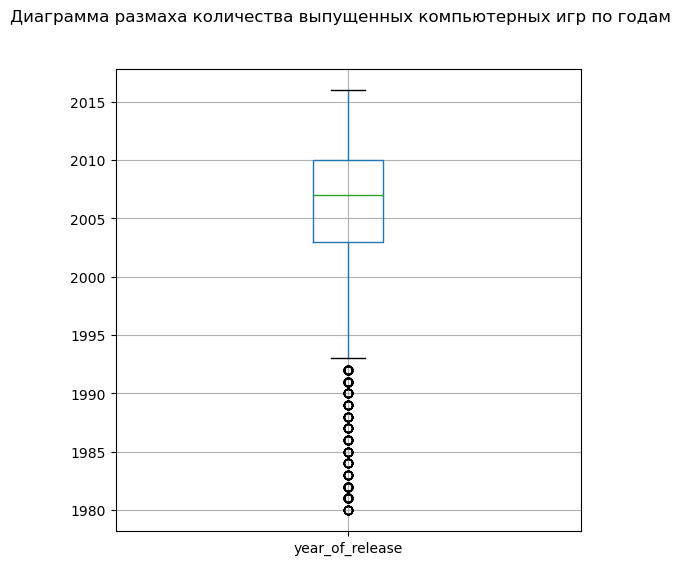

In [21]:
# диаграмма рассеяния
df.boxplot(
    column='year_of_release',
    figsize = (6, 6)
)
plt.suptitle('Диаграмма размаха количества выпущенных компьютерных игр по годам')
plt.show()

Распределение данных тяготеет к нормальному. Имеется небольшое отклонение в отрицательную сторону (среднее значение меньше медианы). Активный рост выпуска игр начинается с 1993 года и достигает пикового значения в 2008 году (выпущено 1427 игр), далее начинается плавный спад. С 2013 по 2016 год количество выпускаемых игр держится примерно на одном уровне (500 - 600 игр/год). По диаграмме размаха можно считать игры выпущенные до 1993 года выбросами - эти данные можно считать наименнее важными. 

### 3.2 Изменение суммарных продаж по платформам

Посмотрим, как менялись продажи по платформам:

In [22]:
# 11 платформ с наибольшими суммарными продажами по убыванию, млн проданных копий
platform_sales_per_years = df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False).head(11)
platform_sales_per_years

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Первые шесть платформ в таблице существенно опережают остальные платформы по продажам, будем ориентироваться на них. Построим распределение по годам:

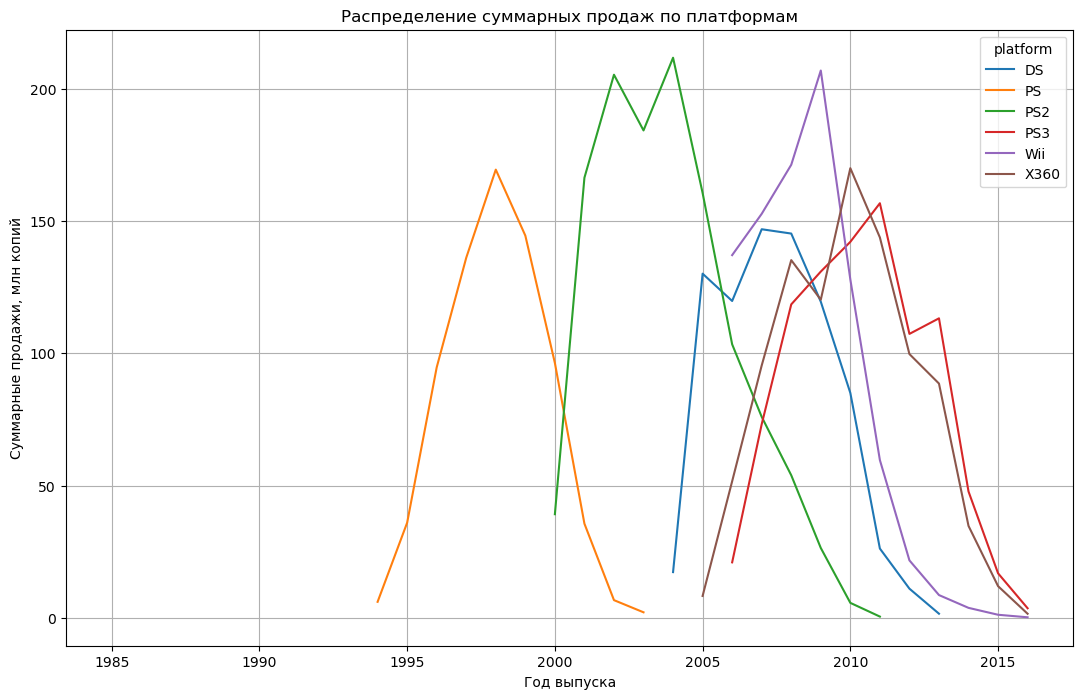

In [23]:
# платформы с наибольшими суммарными продажами и распределение по годам
platform_sales = df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False).head(6).index
(df
    .query('platform in @platform_sales')
    .pivot_table(index = 'year_of_release', columns = 'platform',values = 'total_sales', aggfunc = 'sum')
    .plot(figsize = (13, 8), grid = True, title = 'Распределение суммарных продаж по платформам')
)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

По графику видно, что к лидерам по суммарным продажам можно отнести 6 платформ: PS2 - 1234 млн проданных копий, X360 (961 млн), PS3 (931 млн), Wii (891 млн), DS (803 млн) и PS (728 млн).


Каждая платформа за определенный срок после появления достигает максимума, после наступает спад продаж и неминуемое исчезновение платформы. Характерный срок исчезновения старых платформ зависит от появления и развития платформ нового поколения, что наглядно демонстрирует график. Например, 'смерть' платформы  PS наступила при пиковых значениях продаж игр для обновленной PS2. PS2 прекратила существование по мере роста популярности PS3.

### 3.3 Определение актуального периода

Рассчитаем среднее время жизни платформы:

In [24]:
# платформы, у которых суммарные продажи по годам превышают минимальный порог в 1 млн копий
actual_period = df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('platform in @ platform_sales and total_sales > 1')

# время жизни каждой платформы
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release': 'count'})
print(actual_period)

# среднее время жизни платформы
actual_period.mean()

          year_of_release
platform                 
DS                     10
PS                     10
PS2                    11
PS3                    11
Wii                    10
X360                   12


year_of_release   10.67
dtype: float64

Для определения времени жизни каждой платформы был выбран минимльный порог продаж - 1 млн копий, затем для каждой платформы отобраны суммарные продажи, превышающие этот порог, по годам.

Средняя длительность жизни платформы определялась, как среднее значение этих лет и составляет 11 лет. 

Для определения актуального периода необходимо найти разницу между требуемым по условию 2017 годом и половиной среднего времени жизни платформы, поскольку платформы активно развиваются только половину жизни.

In [25]:
#актуальный период
math.ceil(2017-11/2)

2012

Отфильтруем данные за соответствующий актуальный период, который начинается с 2012 года:

In [26]:
new_df = df.query('year_of_release > 2011')
new_df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01


### 3.4 Выбор потенциально прибыльных платформ

Определим несколько потенциально прибыльных платформ для актуального периода, повторив действия из пункта 3.2:

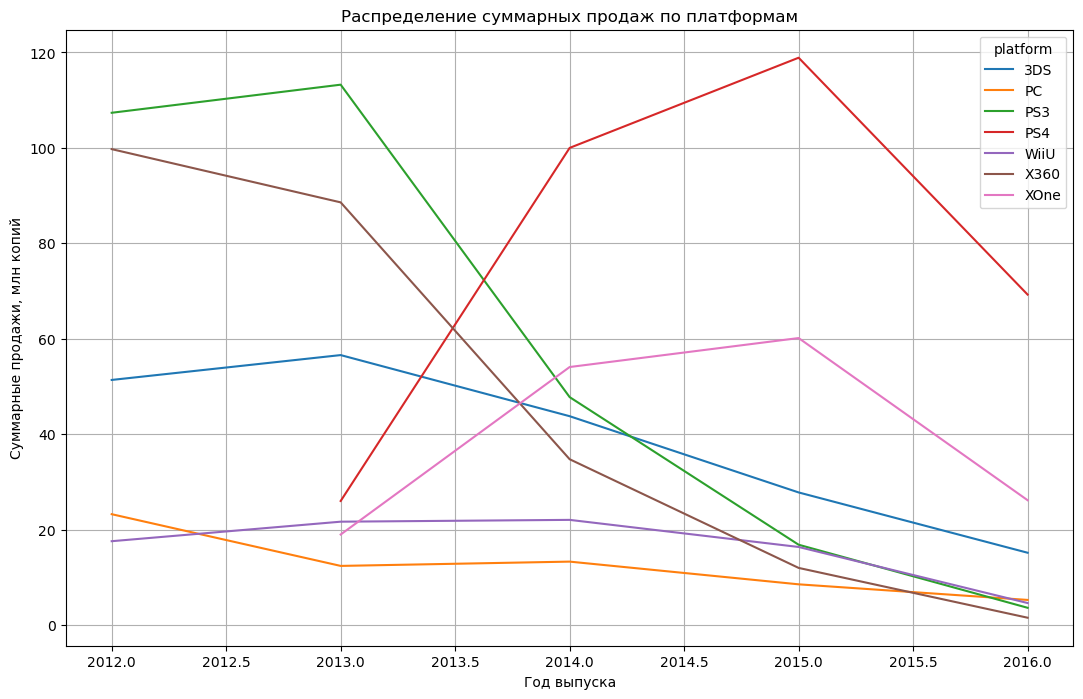

In [27]:
# платформы с наибольшими суммарными продажамами на актуальный период
new_platform_sales = new_df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False).head(7).index
(new_df
    .query('platform in @new_platform_sales')
    .pivot_table(index = 'year_of_release', columns = 'platform',values = 'total_sales', aggfunc = 'sum')
    .plot(figsize = (13, 8), grid = True, title = 'Распределение суммарных продаж по платформам')
)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

In [28]:
# рейтинг платформ с наибольшими суммарными продажами по убыванию, млн проданных копий (актуальный период)
new_platform_sales_per_years = new_df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False).head(7)
new_platform_sales_per_years

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65


Выделены активные платформы на актуальный период с 2012 года. По продажам лидируют PS4 (314 млн проданных копий), PS3 (289 млн), X360 (237 млн), 3DS (195 млн), XOne (159 млн), WiiU (82 млн) и PC (63 млн). При этом, например, у если у PS4 продажи растут, то у PS3 падают, аналогичная ситуация с XOne (продажи увеличиваются) и X360 (продажи снижаются).

Ранее было установлено, что с выходом обновленной версии платформы, продажи игр предшествующей стремительно падают и в конечном итоге стремятся к нулю. Поэтому потенциально прибыльными будем считать последние поколения платформ: PS4, XOne, WiiU, 3DS и PC. На графике видно, что в последние несколько лет актуального периода их продажи растут и становятся выше продаж их предшественников. Продажи старых версий платформ наоборот с каждым годом все ниже.  

Несмотря на то, что по продажам PC уступает другим платформам, она выбрана в качестве потенциально прибыльной по причине своего длительного пребывания на рынке.  

### 3.5 Построение графика 'ящик с усами' по глобальным продажам игр в разбивке по платформам

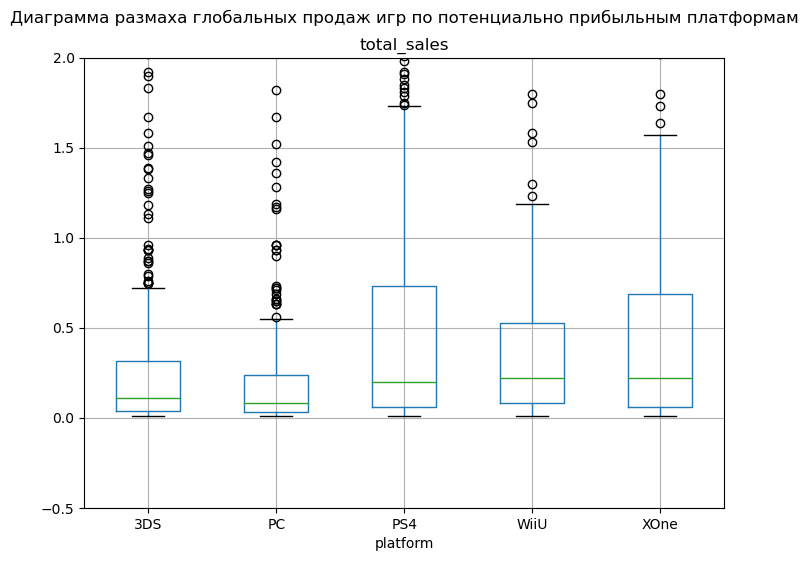

In [29]:
actual_platform = ['PS4', 'XOne', 'WiiU', '3DS', 'PC'] # наиболее перспективно прибыльные платформы

new_df = new_df.query('platform in @ actual_platform')
new_df.boxplot(column = 'total_sales', by = 'platform', figsize=(8, 6))
plt.suptitle('Диаграмма размаха глобальных продаж игр по потенциально прибыльным платформам')
plt.ylim(-0.5, 2)
plt.show()

In [30]:
# медиана, среднее, дисперсия, сто для перспективных платформ
new_df.groupby('platform').agg({'total_sales': ['median', 'mean', 'var', 'std']}) 

total_sales               
              median mean  var  std
platform                           
3DS             0.11 0.49 1.92 1.39
PC              0.08 0.25 0.24 0.49
PS4             0.20 0.80 2.59 1.61
WiiU            0.22 0.56 1.12 1.06
XOne            0.22 0.65 1.07 1.04

Объявим и вызовем функцию emissions( ), которая позволит проанализировать выбросы в данных:

In [31]:
# функция для подсчета количества выбросов для каждой платфоормы
def emissions (platform):
    """
    Принимает на вход:
    - platform - платформа.
    
     Возвращает:
    - рандомную строку датасета, в которой данные выходят за границы интервала наиболее вероятных значений
    
    При вызове функции выводит:
    - название платформы (platform)
    - границы интервала наиболее вероятных значений
    - минимальное значение суммарных продаж (= нижняя граница выбросов)
    - количество выбросов
    """
    print(platform)
    q1 = new_df.loc[new_df['platform'] == platform, 'total_sales'].quantile(0.25) # расчет значения первого квартиля
    q3 = new_df.loc[new_df['platform'] == platform, 'total_sales'].quantile(0.75) # расчет значения третьего квартиля
    iqr = q3 - q1 # межквартильный размах
    print(f'Границы интервала наиболее вероятных значений: {q1 - 1.5 * iqr, q3 + 1.5 * iqr}') 
    print('Минимальное значение суммарных продаж:', new_df.loc[new_df['platform'] == platform]['total_sales'].min())  
    print('Количество выбросов:', new_df.query('platform == @ platform and total_sales > @ q3 + 1.5 * @ iqr')['total_sales'].count())
    return new_df.query('platform == @ platform and total_sales > @ q3 + 1.5 * @ iqr').sample()

In [32]:
# вызов функции emissions()
display(emissions("3DS"))
display(emissions("PC"))
display(emissions("PS4"))
display(emissions("WiiU"))
display(emissions("XOne"))

3DS
Границы интервала наиболее вероятных значений: (-0.36875000000000013, 0.7212500000000002)
Минимальное значение суммарных продаж: 0.01
Количество выбросов: 54


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1708,Mario & Sonic at the London 2012 Olympic Games,3DS,2012,Sports,0.18,0.64,0.27,0.09,NaN,NaN,Не определен,1.18


PC
Границы интервала наиболее вероятных значений: (-0.28500000000000003, 0.5549999999999999)
Минимальное значение суммарных продаж: 0.01
Количество выбросов: 31


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.00,0.22,82.00,4.80,T,1.82


PS4
Границы интервала наиболее вероятных значений: (-0.9449999999999998, 1.7349999999999999)
Минимальное значение суммарных продаж: 0.01
Количество выбросов: 54


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60


WiiU
Границы интервала наиболее вероятных значений: (-0.5875000000000001, 1.1925000000000001)
Минимальное значение суммарных продаж: 0.01
Количество выбросов: 14


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.00,8.50,E10+,4.44


XOne
Границы интервала наиболее вероятных значений: (-0.8775, 1.6225)
Минимальное значение суммарных продаж: 0.01
Количество выбросов: 27


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86.00,6.40,M,2.95


По боксплотам видно, что за границами нормального размаха присутствуют выбросы. Наличие в данных выбросов можно объяснить небольшим количеством наиболее популярных игр, продажи которых во много раз превышают медианные значения. 


Следовательно, сравнивать данные лучше по медиане, а не по среднему, так как медиана к ним устойчива. Больше всего копий игр продано для платформ WiiU и XOne - по 220 тыс. PS4 - 200 тыс копий. Наименьшие суммарные продажи принадлежат PC (80 тыс).

Для всех популярных платформ медиана меньше среднего, отсюда можно сделать вывод о том, что рапределения скошенны вправо.

 
Данные по PS4 сильнее всего размазаны относительно среднего и имеют большие значения дисперсии и стандартного отклонения, а значит игры для этой платформы в целом продаются лучше.


### 3.6 Влияние отзывов пользователей и критиков на продажи PS4 и на остальные потенциально прибыльные платформы

Чтобы понимать, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков, построим диаграммы рассеяния:

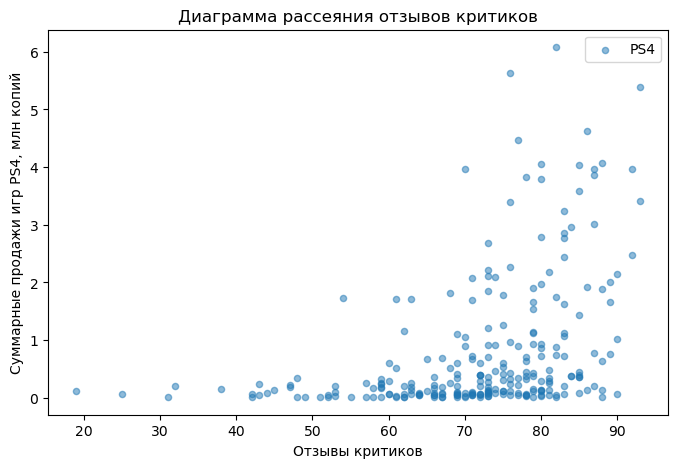

In [33]:
# диагамма рассеяния отзывов критиков
new_df.query('platform == "PS4" and total_sales < total_sales.quantile(0.99)').plot(
    x = 'critic_score',
    y = 'total_sales',
    kind = 'scatter',
    alpha = 0.5,
    figsize = (8, 5),
    title = 'Диаграмма рассеяния отзывов критиков',
    label = 'PS4'
   
)
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи игр PS4, млн копий')
plt.show()

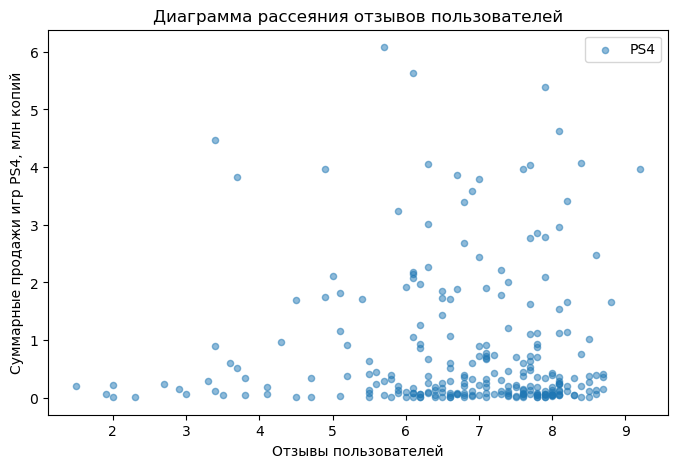

In [34]:
# диаграмма рассеяния отзывов пользователей
new_df.query('platform == "PS4" and total_sales < total_sales.quantile(0.99)').plot(
    x = 'user_score',
    y = 'total_sales',
    kind = 'scatter',
    alpha = 0.5,
    figsize = (8, 5),
    title = 'Диаграмма рассеяния отзывов пользователей',
    label = 'PS4'
)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи игр PS4, млн копий')
plt.show()

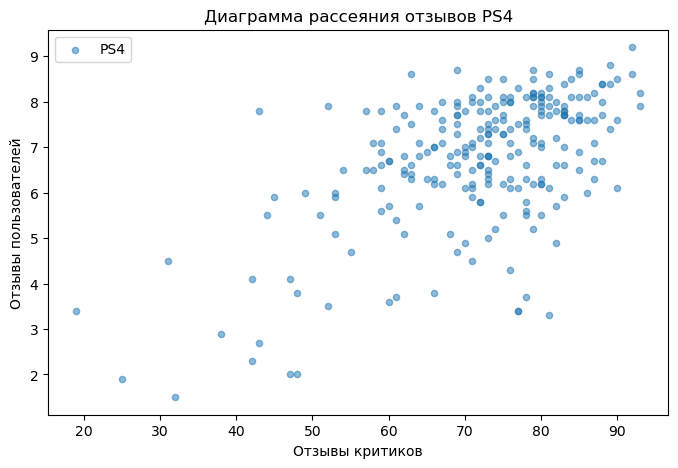

In [35]:
# диаграмма рассеяния отзывов
new_df.query('platform == "PS4" and total_sales < total_sales.quantile(0.99)').plot(
    x = 'critic_score',
    y = 'user_score',
    kind = 'scatter',
    alpha = 0.5,
    figsize = (8, 5),
    title = 'Диаграмма рассеяния отзывов PS4',
    label = 'PS4'
)
plt.xlabel('Отзывы критиков')
plt.ylabel('Отзывы пользователей')
plt.show()

Рассчитаем значения коэффициента корреляции между отзывами и продажами для PS4:

In [36]:
# коэффициенты корреляции
ps4 = new_df[new_df['platform'] == "PS4"]
print('PS4')
ps4[['critic_score', 'user_score', 'total_sales']].corr()

PS4


,critic_score,user_score,total_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
total_sales,0.41,-0.03,1.00


Отзывы критиков коррелируют с суммарными продажами игр для PS4, т.е. существует прямая линейная зависимость, однако эта связь не слишком сильна (0.41).

Между отзывами пользователей и суммарными продажами PS4 линейная зависимость не обнаружена (-0.03), это говорит о возможности наличия связи более сложного характера.

Самый высокий коэффициент корреляции между отзывами пользователей и отзывами критиков: 0.56. Это может говорить о том, что на оценку от пользователей положительно влияют оценки критиков. 

При построении диаграмм рассеяния было учтено, что коэффициент корреляции чувствителен к выбросам.

Объявим функцию scattering_sales_critic_user( ), которая позволит определить влияние на продажи внутри остальных прибыльных платформ отзывов пользователей и критиков. А также соотнести выводы  по PS4 с продажами игр на других платформах:

In [37]:
# ф-ция для построения диагамм рассеяния 
def scattering_sales_critic_user(platform): 
    """
    Принимает на вход:
    - platform - платформа.
    
     Возвращает:
    - название платформы (platform)
    
    При вызове функции выводит:
    - диагамма рассеяния отзывов критиков
    - диагамма рассеяния отзывов пользователей
    - диагамма рассеяния отзывов 
    """
    new_df.query('platform == @ platform and total_sales < total_sales.quantile(0.99)').plot(
        x = 'critic_score',
        y = 'total_sales',
        kind = 'scatter',
        alpha = 0.5,
        figsize = (8, 5),
        title = 'Диаграмма рассеяния отзывов критиков',
        label = platform
    )
    plt.xlabel('Отзывы критиков') # диагамма рассеяния отзывов критиков
    plt.ylabel('Суммарные продажи игр, млн копий')
    
    
    new_df.query('platform == @ platform and total_sales < total_sales.quantile(0.99)').plot(
        x = 'user_score',
        y = 'total_sales',
        kind = 'scatter',
        alpha = 0.5,
        figsize = (8, 5),
        title = 'Диаграмма рассеяния отзывов пользователей',
        label = platform
    )
    plt.xlabel('Отзывы пользователей') # диагамма рассеяния отзывов пользователей
    plt.ylabel('Суммарные продажи игр, млн копий')
    
    
    new_df.query('platform == @ platform and total_sales < total_sales.quantile(0.99)').plot(
        x = 'critic_score',
        y = 'user_score',
        kind = 'scatter',
        alpha = 0.5,
        figsize = (8, 5),
        title = 'Диаграмма рассеяния отзывов',
        label = platform
    )
    plt.xlabel('Отзывы критиков') # диагамма рассеяния отзывов 
    plt.ylabel('Отзывы пользователей')
    plt.show()

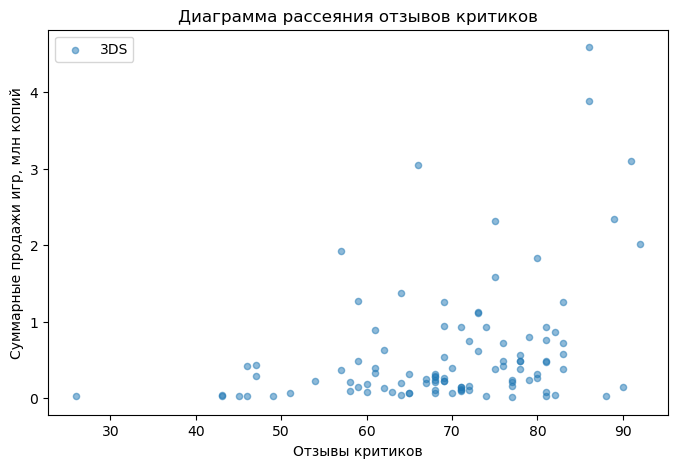

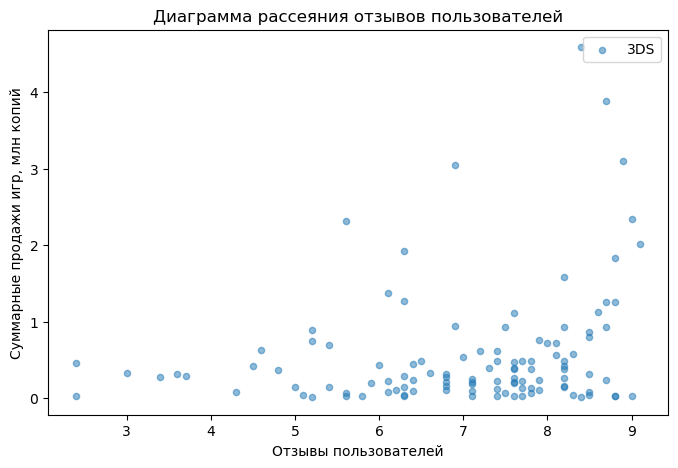

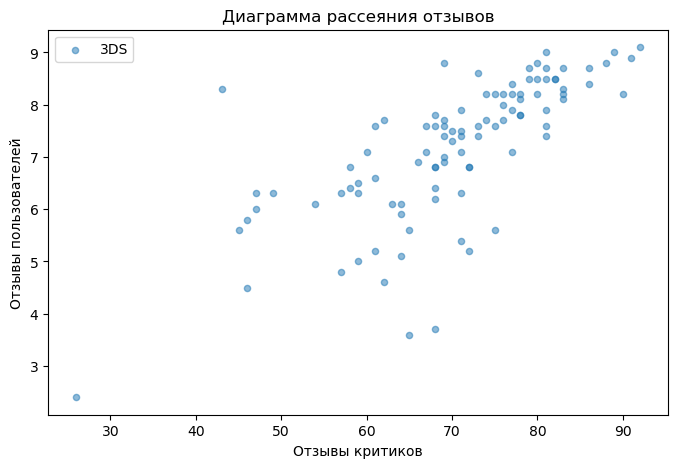

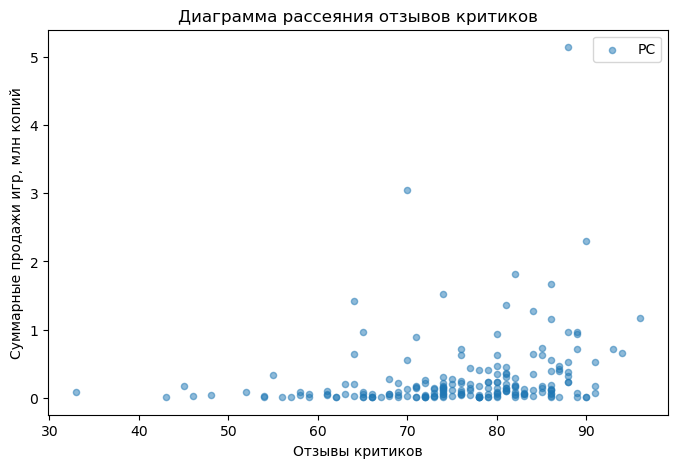

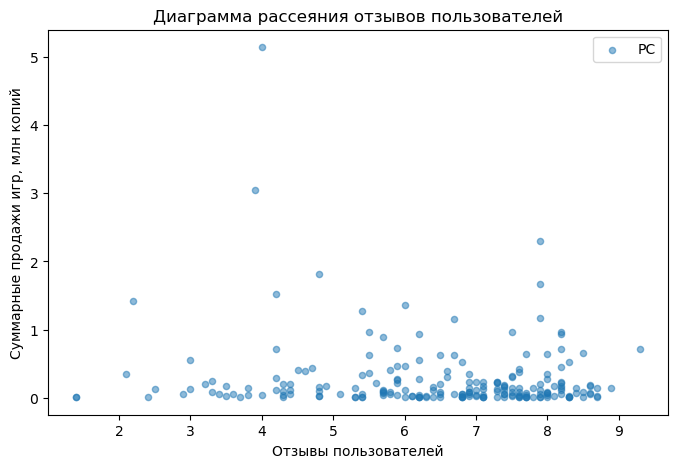

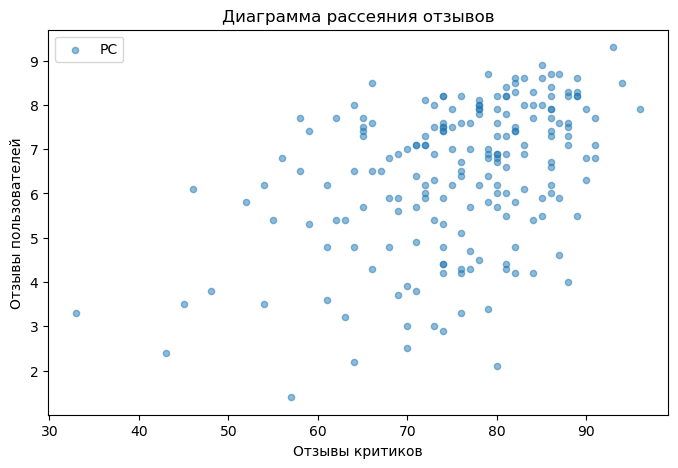

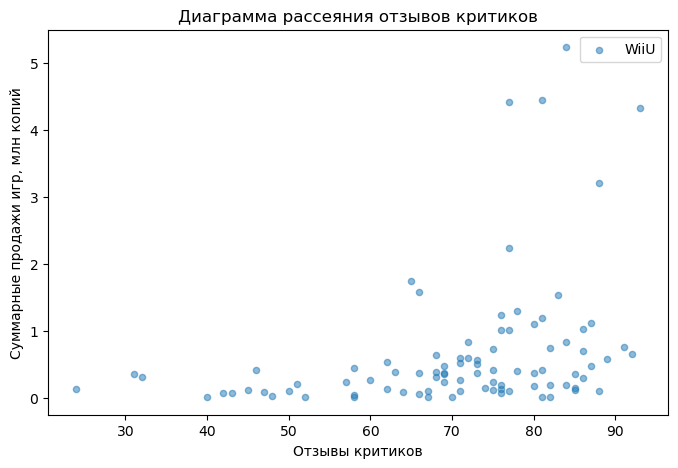

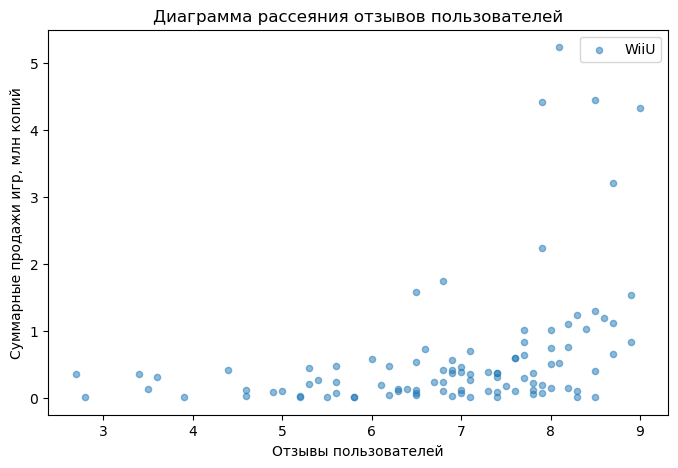

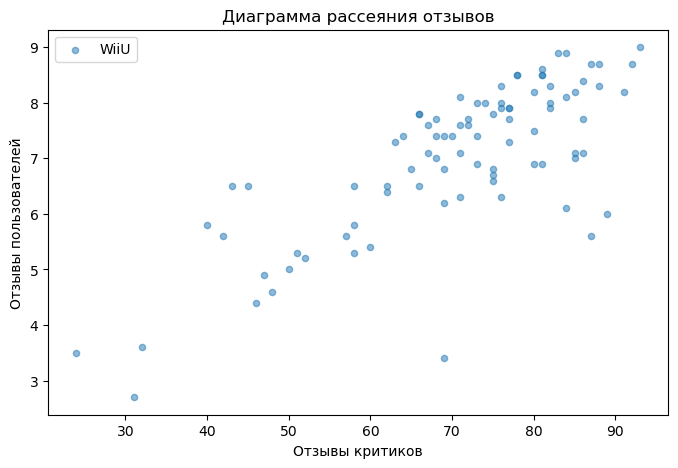

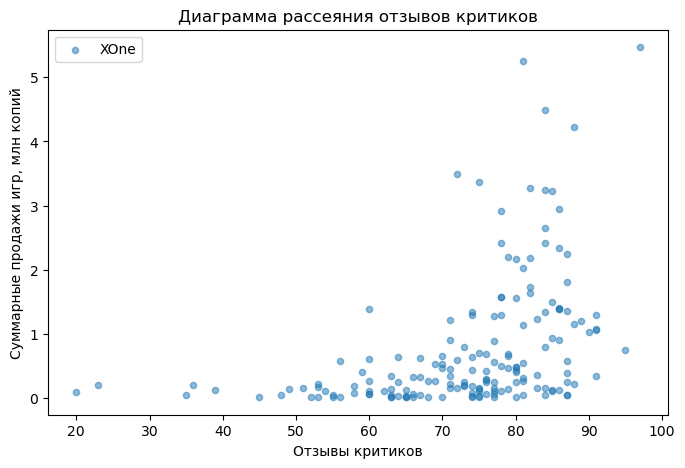

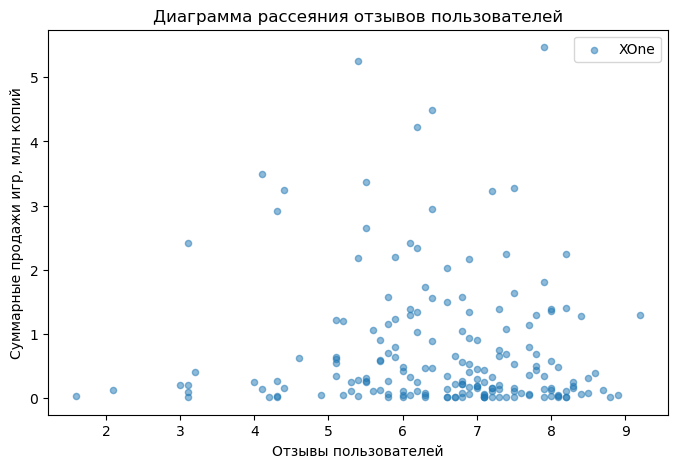

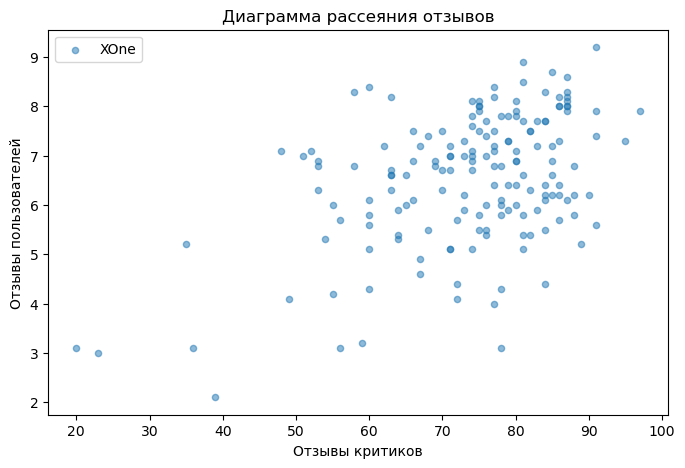

In [38]:
# вызов функции scattering_sales_critic_user () для оставшихся платформ
scattering_sales_critic_user("3DS")
scattering_sales_critic_user("PC")
scattering_sales_critic_user("WiiU")
scattering_sales_critic_user("XOne")

Рассчитаем значения коэффициентов корреляции между отзывами и продажами для остальных платформ в цикле:

In [39]:
# расчет значений коэффициентов корреляции
other_platform = ['XOne', 'WiiU', '3DS', 'PC']

for item in other_platform:
    print(item)
    display(new_df.query('platform == @item')[['critic_score', 'user_score', 'total_sales']].corr())
    print()

XOne


,critic_score,user_score,total_sales
critic_score,1.00,0.47,0.42
user_score,0.47,1.00,-0.07
total_sales,0.42,-0.07,1.00



WiiU


,critic_score,user_score,total_sales
critic_score,1.00,0.77,0.35
user_score,0.77,1.00,0.40
total_sales,0.35,0.40,1.00



3DS


,critic_score,user_score,total_sales
critic_score,1.00,0.72,0.32
user_score,0.72,1.00,0.20
total_sales,0.32,0.20,1.00



PC


,critic_score,user_score,total_sales
critic_score,1.00,0.43,0.24
user_score,0.43,1.00,-0.12
total_sales,0.24,-0.12,1.00


Наибольшая положительная связь устрановлена для всех платформ между отзывами критиков и отзывами пользователей и сильнее всего она для платформ WiiU и 3DS:
- XOne 0.47
- WiiU 0.77
- 3DS 0.72
- PC 0.43

Так же выявлена средняя линейная взаимосвязь между отзывами критиков и суммарными продажами, т.е. количество проданных копий растет с ростом оценки от критиков:
- XOne 0.42
- WiiU 0.35
- 3DS 0.32
- PC 0.24

Между отзывами пользователей и продажами выявлен разный характер связи, для платформ WiiU (0.4) и 3DS (0.20) положительно средний, а для XOne (-0.07) и PC (-0.12) линейная связь отсутсвует. То есть при покупке игр для платформ Xone и PC пользователи не руководствуются отзывами других пользователей. 

В целом ситуация аналогична платформе PS4.

### 3.7 Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам:

In [40]:
# распределение игр по жанрам
genre_sales = new_df.groupby('genre').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False)
genre_sales

,total_sales
genre,
Action,211.11
Shooter,169.30
Role-Playing,135.38
Sports,93.00
Platform,49.40
Misc,38.26
Racing,31.31
Simulation,31.27
Fighting,25.95


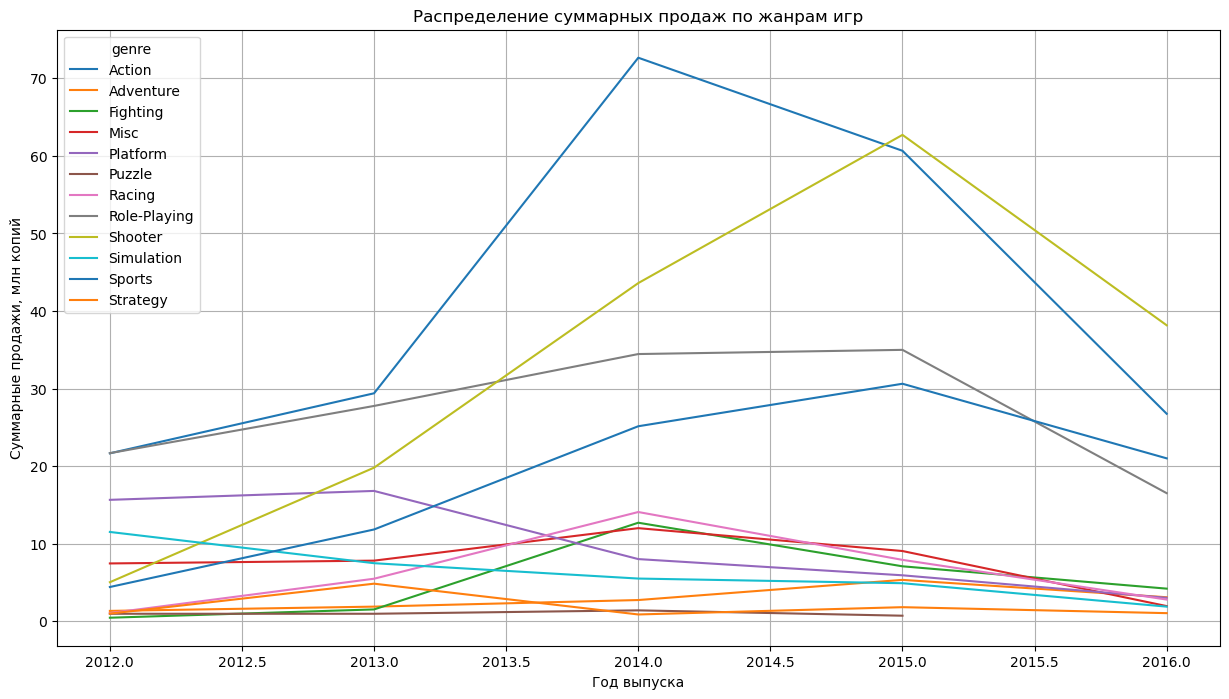

In [41]:
genre_sales = new_df.groupby('genre').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False).head(12).index
(new_df
    .query('genre in @genre_sales')
    .pivot_table(index = 'year_of_release', columns = 'genre',values = 'total_sales', aggfunc = 'sum')
    .plot(figsize = (15, 8), grid = True, title = 'Распределение суммарных продаж по жанрам игр')
)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.show()

Построим боксплоты продаж игр по жанрам:

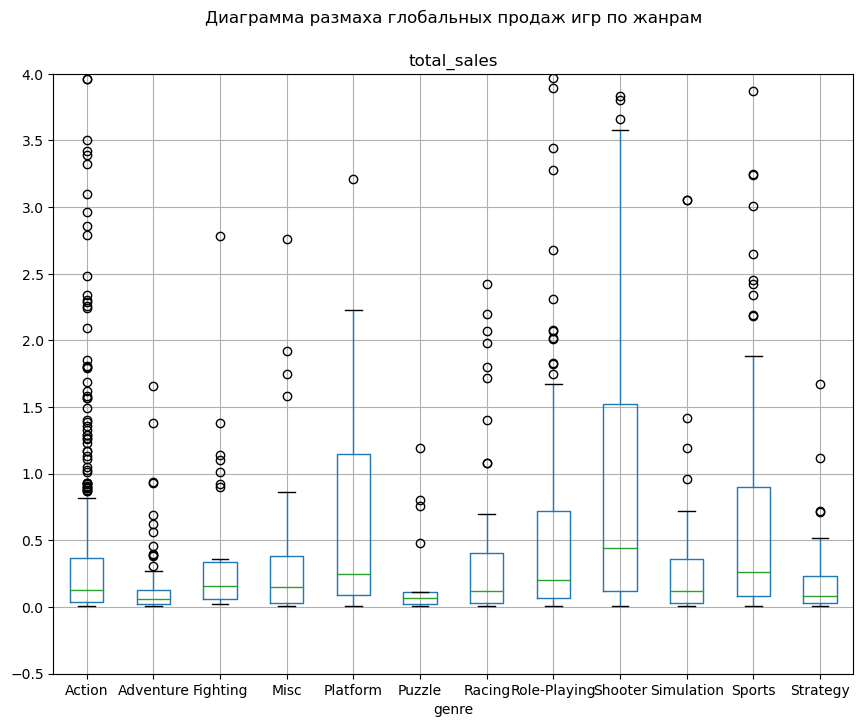

In [42]:
# ящики с усами 
new_df.boxplot(column = 'total_sales', by = 'genre', figsize = (10,8))
plt.suptitle('Диаграмма размаха глобальных продаж игр по жанрам')
plt.ylim(-0.5, 4)
plt.show()

Рассчитаем числовые характеристики продаж по жанрам:

In [43]:
# медиана, среднее, дисперсия, сто, мин, макс продаж по жанрам
new_df.groupby('genre').agg({'total_sales': ['median', 'mean', 'var', 'std', 'min', 'max']}) 

total_sales                          
                  median mean  var  std  min   max
genre                                             
Action              0.13 0.41 0.83 0.91 0.01 12.62
Adventure           0.06 0.15 0.07 0.27 0.01  1.66
Fighting            0.15 0.62 1.96 1.40 0.02  7.55
Misc                0.15 0.36 0.48 0.69 0.01  4.42
Platform            0.24 0.88 2.63 1.62 0.01  9.90
Puzzle              0.07 0.20 0.11 0.33 0.01  1.19
Racing              0.12 0.50 1.09 1.04 0.01  7.09
Role-Playing        0.21 0.76 2.98 1.73 0.01 14.60
Shooter             0.44 1.28 4.14 2.04 0.01 14.63
Simulation          0.12 0.58 2.24 1.50 0.01  9.17
Sports              0.26 0.77 1.79 1.34 0.01  8.58
Strategy            0.08 0.19 0.09 0.31 0.01  1.67

Объявим функцию genres( ), которая позволит проанализировать выбросы в данных:

In [44]:
# функция для подсчета количества выбросов по жанрам
def genres (genre):
    """
    Принимает на вход:
    - genre - жанр игры.
    
     Возвращает:
    - рандомную строку датасета, в которой данные выходят за границы интервала наиболее вероятных значений
    
    При вызове функции выводит:
    - жанр игры (genre)
    - границы интервала наиболее вероятных значений
    - количество выбросов
    """
    print(genre)
    q1 = new_df.loc[new_df['genre'] == genre, 'total_sales'].quantile(0.25) # расчет значения первого квартиля
    q3 = new_df.loc[new_df['genre'] == genre, 'total_sales'].quantile(0.75) # расчет значения третьего квартиля
    iqr = q3 - q1 # межквартильный размах
    print(f'Границы интервала наиболее вероятных значений: {q1 - 1.5 * iqr, q3 + 1.5 * iqr}') 
    print('Количество выбросов:', new_df.query('genre == @ genre and total_sales > @ q3 + 1.5 * @ iqr')['total_sales'].count())
    return new_df.query('genre == @ genre and total_sales > @ q3 + 1.5 * @ iqr').sample()

In [45]:
# вызов функции genres()
display(genres("Action"))
display(genres("Shooter"))
display(genres("Role-Playing"))
display(genres("Sports"))
display(genres("Platform"))
display(genres("Simulation"))
display(genres("Racing"))
display(genres("Misc"))
display(genres("Fighting"))
display(genres("Strategy"))
display(genres("Adventure"))
display(genres("Puzzle"))

Action
Границы интервала наиболее вероятных значений: (-0.455, 0.865)
Количество выбросов: 60


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.00,4.10,M,3.50


Shooter
Границы интервала наиболее вероятных значений: (-1.9874999999999998, 3.6325)
Количество выбросов: 15


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
323,Call of Duty: Ghosts,PS4,2013,Shooter,1.78,1.43,0.05,0.57,78.00,3.70,M,3.83


Role-Playing
Границы интервала наиболее вероятных значений: (-0.9050000000000002, 1.6950000000000003)
Количество выбросов: 19


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,Не определен,7.14


Sports
Границы интервала наиболее вероятных значений: (-1.15, 2.13)
Количество выбросов: 13


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.00,6.30,E,3.01


Platform
Границы интервала наиболее вероятных значений: (-1.5, 2.74)
Количество выбросов: 4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
424,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.00,8.70,E,3.21


Simulation
Границы интервала наиболее вероятных значений: (-0.46125000000000005, 0.84875)
Количество выбросов: 7


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.00,0.23,70.00,3.90,T,3.05


Racing
Границы интервала наиболее вероятных значений: (-0.5325, 0.9675)
Количество выбросов: 10


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
639,Need for Speed (2015),PS4,2015,Racing,0.50,1.50,0.05,0.37,NaN,NaN,Не определен,2.42


Misc
Границы интервала наиболее вероятных значений: (-0.5025, 0.9175)
Количество выбросов: 6


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1174,Mario Party 10,WiiU,2015,Misc,0.69,0.53,0.24,0.12,66.00,6.50,E,1.58


Fighting
Границы интервала наиболее вероятных значений: (-0.35624999999999996, 0.7537499999999999)
Количество выбросов: 9


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2056,Pokken Tournament,WiiU,2016,Fighting,0.50,0.26,0.17,0.08,76.00,8.00,E10+,1.01


Strategy
Границы интервала наиболее вероятных значений: (-0.27, 0.53)
Количество выбросов: 4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2829,Total War: Rome II,PC,2013,Strategy,0.12,0.53,0.00,0.07,76.00,4.20,T,0.72


Adventure
Границы интервала наиболее вероятных значений: (-0.13250000000000003, 0.28750000000000003)
Количество выбросов: 12


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2936,Minecraft: Story Mode,PS4,2015,Adventure,0.25,0.33,0.00,0.11,NaN,NaN,Не определен,0.69


Puzzle
Границы интервала наиболее вероятных значений: (-0.115, 0.245)
Количество выбросов: 4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4072,Puzzle & Dragons Z + Super Mario Bros. Edition,3DS,2015,Puzzle,0.06,0.07,0.34,0.01,NaN,NaN,Не определен,0.48


Нижняя граница интервала наиболее вероятных значений для всех жанров будет равна 0.01, верхняя в соответствии с рассчитанными значениями.

К 2016 году в топ-5 самых прибыльных жанров входят (в млн проданных копий): 
- Action	211.11 
- Shooter	169.30 
- Role-Playing	135.38 
- Sports	93.00 
- Platform	49.40

По диаграммам размаха можно наблюдать, что у таких прибыльных жанров, как Shooter, Role-Playing, Sports, Platform в сравнении с жанром Action размах усов больше, а значит больше дисперсия и стандартные отклонения. У всех жанров медиана меньше среднего значения, следовательно данные скошены вправо. Это говорит о том, что у жанра Action выходили игры-бестселлеры, благодаря которым были жанр стал самым прибыльным. Таких игр было 60 (относятся к выбросам), что в четыре раза больше, чем у второго по прибыльности жанра Shooter (15). Самые малоприбыльные жанры Puzzle (4), Adventure (12), Strategy (4) и т.д. не могут похвастаться большим количеством выпущенных бестселлеров.

При этом у  жанров Shooter, Sport, Platform и Role-Playing и  значения медиан самые высокие - 0.44, 0.26, 0.24 и 0.21 соответственно. То есть игры этих жанров в целом продаются лучше.  

### 3.8 Выводы

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы с 1980 по 2016 год. Однако, для прогноза продаж на 2017 год данные важны не по всем периодам.

В ходе исследовательского анализа построено распределение выпущенных компьютерных игр по годам, которое позволило определить, что в 2008 году было выпущено максимальное количество игр - 1427, в дальнейшие годы наблюдается спад. 

Рассмотрены изменения продаж по платформам, выбраны платформы с наибольшими суммарными продажами: PS2 - 1234 млн проданных копий,  X360 (961 млн), PS3 (931 млн), Wii (891 млн), DS (803 млн). Характерный срок исчезновения платформ зависит от появления платформы нового поколения. 

Рассчитана средняя длительность жизни платформы, она составляет 11 лет, на основании этого определен актуальный период - с 2012 по 2017 год. Данные до 2012 года в исследовании не участуют.

Вывбрано 5 потенциально прибыльных платформ: PS4, XOne (159 млн), WiiU (82 млн), 3DS (195 млн) и PC (63 млн) по причине роста суммарных продаж в сравненнии с платформами  предыдущего поколения. Данные по PS4 сильнее всего разбросаны относительно других платформ, а значит игры для этой платформы в целом продаются лучше. Оценки критиков влияют на продажи игр для всех платформ. При покупке игр для платформ Xone и PC и PS4 пользователи не руководствуются отзывами других пользователей. На оценки пользователей могут влиять оценки критиков.

Построены распределения игр по жанрам. На 2016 год самыми прибыльными жанрами являются: Action, Shooter, Role-Playing, Sports, Platform. У жанра Action издано 60 игр-бестселлеров, благодаря которым были жанр стал самым прибыльным. У малоприбыльных жанров Puzzle, Adventure, Strategy и таких игр выпущено в разы меньше. 




## 4 Портрет пользователя каждого региона (NA, EU, JP)

Определим для пользователя каждого региона (Северная Америка, Европа, Япония):

### 4.1 Самые популярные платформы

In [46]:
# продажи по 5-ти популярным платформам в Северной Америке, Европе, Японии, млн проданных копий
regions = ['na_sales', 'eu_sales', 'jp_sales'] 

for region in regions:
    display(new_df.groupby('platform').agg({region: 'sum'}).sort_values(by = region, ascending = False).head())

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12


,eu_sales
platform,
PS4,141.09
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13


,jp_sales
platform,
3DS,87.79
PS4,15.96
WiiU,13.01
XOne,0.34
PC,0.00


Визуализируем полученные результаты:

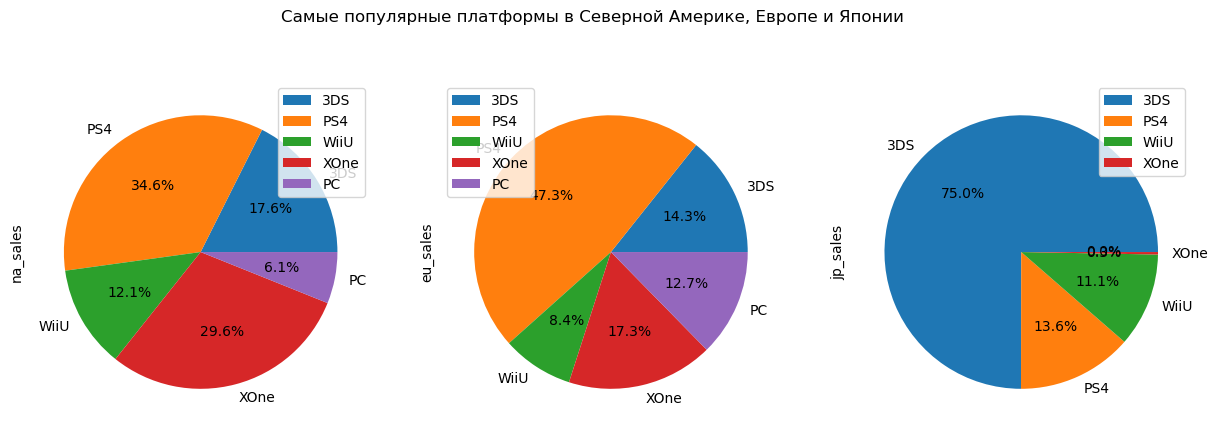

In [47]:
# pie-chart
(new_df
     .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]
     .sum()
     .sort_values(by = region, ascending = False)
     .head()
     .plot.pie(
         subplots = True,
         figsize = (15, 5),
         autopct = '%1.1f%%',
         title = 'Самые популярные платформы в Северной Америке, Европе и Японии'
     )
)
plt.show()

В Северной Америке большей популярностью пользуется платформа PS4 (34.6 %), вторая по продажам XOne (29.6 %), замыкает тройку лидеров 3DS (17.6 %). Реже всего покупают игры для PC и WiiU.

В Европе около половины продаж приходится на PS4 (47.3 %), на втором месте, как и в Америке XOne (17.3 %). Средней популярностью пользуются 3DS (14.3 %) и PC (12.7 %). Меньше всего продаж у WiiU (8.4 %).

В Японии абсолютно другая ситуация, 75 % продаж отностятся к платформе 3DS, а на самую прибыльную в Америке и Европе PS4 приходится 13.6 %. WiiU находится примерно на одном уровне с другими регионами - 11.1 %, продажи на PC равны нулю.

### 4.2 Самые популярные жанры

,na_sales
genre,
Action,81.93
Shooter,76.81
Role-Playing,44.79
Sports,37.75
Platform,20.19


,eu_sales
genre,
Action,78.85
Shooter,66.79
Sports,40.06
Role-Playing,37.20
Platform,16.70


,jp_sales
genre,
Role-Playing,43.38
Action,27.55
Simulation,9.57
Platform,8.49
Misc,8.24


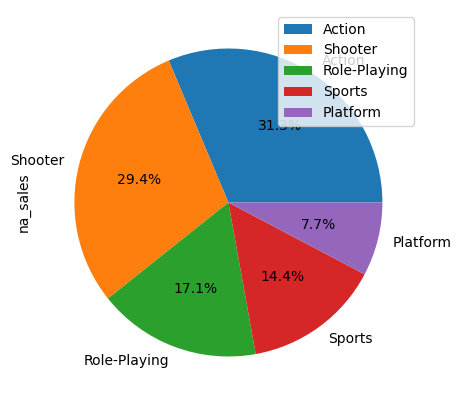

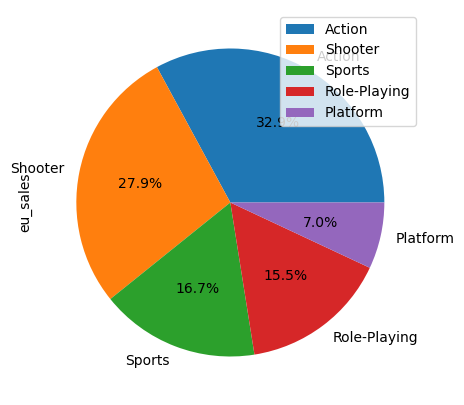

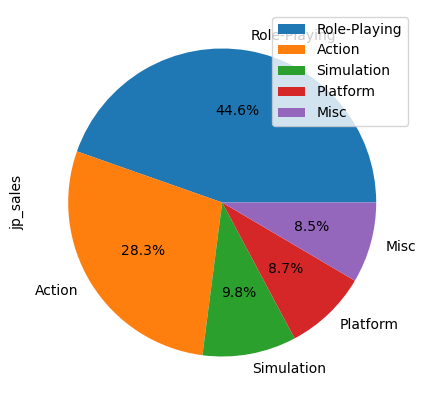

In [48]:
# продажи по 5-ти популярным жанрам в Северной Америке, Европе, Японии, млн проданных копий
top_genre = ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Platform', 'Simulation', 'Racing', 'Misc', 'Fighting', 'Strategy', 'Adventure', 'Puzzle']

for region in regions:
    display(new_df.query('genre in @ top_genre').pivot_table(index = 'genre', values = region, aggfunc = 'sum').sort_values(by = region, ascending = False).head())
    new_df.query('genre in @ top_genre').pivot_table(index = 'genre', values = region, aggfunc = 'sum').sort_values(by = region, ascending = False).head().plot.pie(subplots = True, figsize = (15, 5), autopct = '%1.1f%%')


В Северной Америке наиболее популярны жанры Action (31 %) и Shooter (29.4 %), средней популярностью пользуются жанры Role-Playing (17.1 %) и Sports (14.4 %), самые низкие продажи у Platform (7.7 %).

В Европе популярны те же самые жанры, что и в Америке, но в других соотношениях: Action (33 %) и Shooter (27.9 %), Role-Playing (15.5 %) и Sports (16.7 %) и Platform (7 %)

Как и в случае с платформами, Япония отличается от Америки и Европы, самый популярный жанр здесь - Role-Playing, на него приходится большая часть продаж - 44.6 %, за ним следует Action - 28.3 %. Практически одинаковой популярностью пользуются Platform (8.7 %), Simolation (9.8 %) и Misc (8.5 %).

### 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

In [49]:
#продажи по рейтингу в Северной Америке, Европе, Японии, млн проданных копий
regions = ['na_sales', 'eu_sales', 'jp_sales'] 

for region in regions:
    display(new_df.groupby('rating').agg({region: 'sum'}).sort_values(by = region, ascending = False))

,na_sales
rating,
M,102.80
Не определен,71.09
E,64.07
E10+,39.05
T,37.38


,eu_sales
rating,
M,101.37
E,67.48
Не определен,66.32
T,34.49
E10+,28.55


,jp_sales
rating,
Не определен,69.14
E,23.83
T,9.59
E10+,7.34
M,7.20


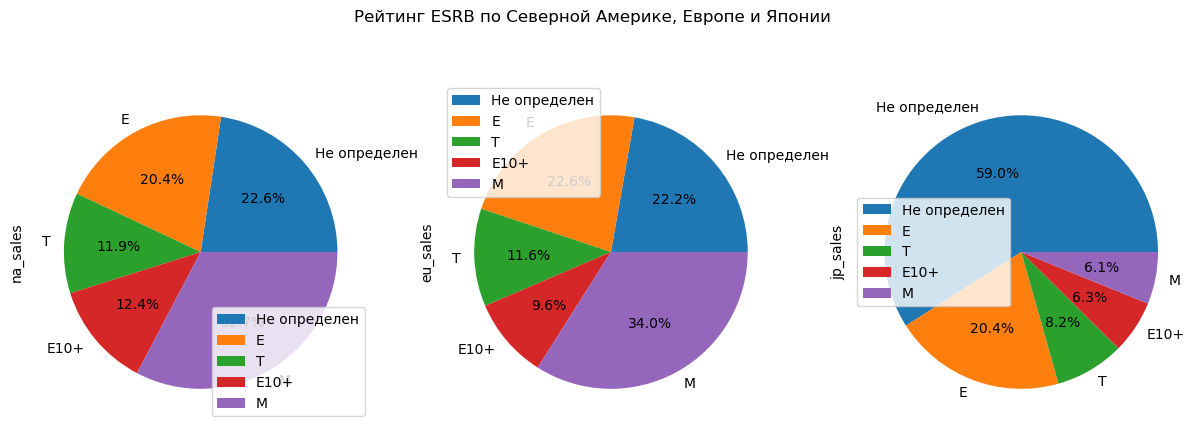

In [50]:
(new_df
     .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
     .sum()
     .sort_values(by = region, ascending = False)
     .plot.pie(
         subplots = True,
         figsize = (15, 5),
         autopct = '%1.1f%%',
         title = 'Рейтинг ESRB по Северной Америке, Европе и Японии'
     )
)
plt.show()

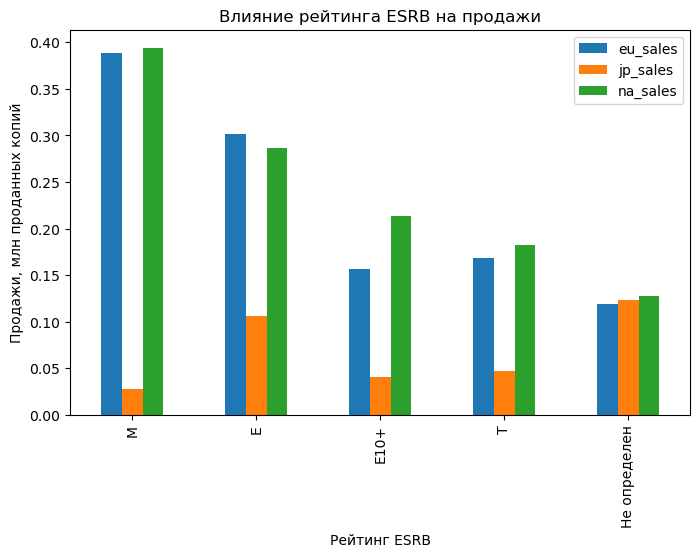

In [51]:
(new_df
 .pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'])
 .sort_values(by = 'na_sales', ascending = False)
 .plot(kind = 'bar', figsize = (8, 5), title = 'Влияние рейтинга ESRB на продажи')
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн проданных копий')
plt.show()

In [52]:
# единственная игра с рейтингом АО, которая не попала в актуальный период
df.query('rating == "AO"') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93.00,8.60,AO,1.96


In [53]:
# игры с рейтингом Не определен и не нулевыми продажами только в Японии
new_df[(new_df['rating'] == 'Не определен') & (new_df['na_sales'] == 0) & (new_df['eu_sales'] == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,Не определен,3.44
563,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,Не определен,2.68
694,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,NaN,NaN,Не определен,2.29
1244,Puzzle & Dragons,3DS,2013,Role-Playing,0.00,0.00,1.51,0.00,NaN,NaN,Не определен,1.51
1466,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,Не определен,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,Не определен,0.01


В Северной Америке и Европе у игр с рейтингом 'М' ('Для взрослых': не подходят для подростков младше 17 лет) больше всего продаж - около 33 - 34 %. Далее по популярности игры с рейтингом 'E' ('Для всех'): 20.4 % в Америке и 22.6 % в Европе. Менее популярны рейтинги 'T' ('Подросткам') - около 12 %, 'E10+' ('Для всех от 10 лет и старше') - 9.6-12.4 % от всего рынка. Около 22 % относится к заполненному вручную на этапе подготовки данных рейтингу 'Не определен'. 

По диаграммам вновь можно заметить, что Япония отличается от Северной Америки и Европы. К самым продаваемым в Японии играм относятся игры с рейтингом 'E' (20.4 %). Менее популярны игры с рейтингами: 'T' (8.2 %), 'E10+' (6.3 %), 'M' (6.1 %). Больше половины продаваемых игр относится к заполненому на этапе подготовки данных 'Не определен' (241 игра). Вероятно данные с рейтингами были утеряны или же эти игры классифицируются другими рейтингами. Таким образом, можно сделать вывод, что рейтинг ESRB несущественно влияет на продажи в Японии в отличии от Северной Америки и Европы.



### 4.4 Выводы

Составлены портреты пользователя для каждого региона. 

1) Северная Америка: 
- Популярные платформы: PS4, XOne, 3DS;
- Популярные жанры игр: Action, Shooter, Role-Playing, Sports и Platform;
- Наиболее популярный рейтинг игр по ESRB: 'M' ('Старше 17'), 'E' ('Для всех').

2) Европа:
- Популярные платформы: PS4, XOne, 3DS;
- Популярные жанры игр: Action, Shooter, Role-Playing, Sports и Platform;
- Наиболее популярный рейтинг игр по ESRB: 'M' ('Старше 17'), 'E' ('Для всех').

3) Япония:
- Популярные платформы: 3DS, PS4, WiiU;
- Популярные жанры игр: Role-Playing, Action, Platform, Simulation и Misc;
- Наиболее популярный рейтинг игр по ESRB: если не учитывать малое влияние рейтинга на японский рынок - 'E' ('Для всех') и 'T' ('Подросткам').

## 5 Проверка гипотез

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0** - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H1** - cредние пользовательские рейтинги платформ Xbox One и PC разные

Для проверки выбран критерий p-value, критический уровень статистической значимости принят 0.05.

Перед проверкой гипотез из данных необходимо удалить пропуски.

In [54]:
xone_score = new_df.query('platform == "XOne" and (user_score != "nan")')['user_score'].dropna()
pc_score = new_df.query('(platform == "PC") and (user_score != "nan")')['user_score'].dropna()

print(xone_score.isna().sum())
print(pc_score.isna().sum())

0
0


Построим распределение каждой выборки, чтобы понимать нормальное ли у них распределение.

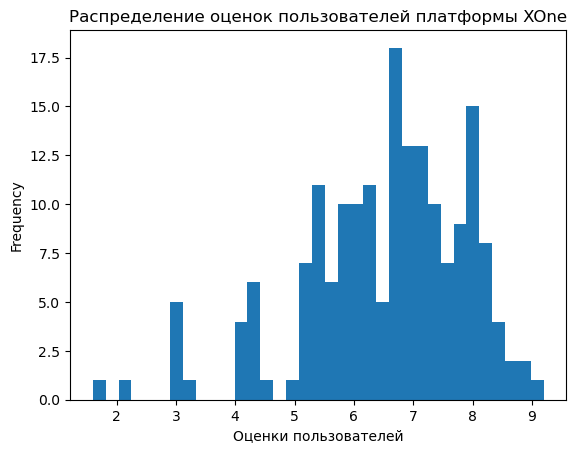

In [55]:
# XOne
xone_score.plot(kind = 'hist', bins = 35, title = 'Распределение оценок пользователей платформы XOne')
plt.xlabel('Оценки пользователей')
plt.show()

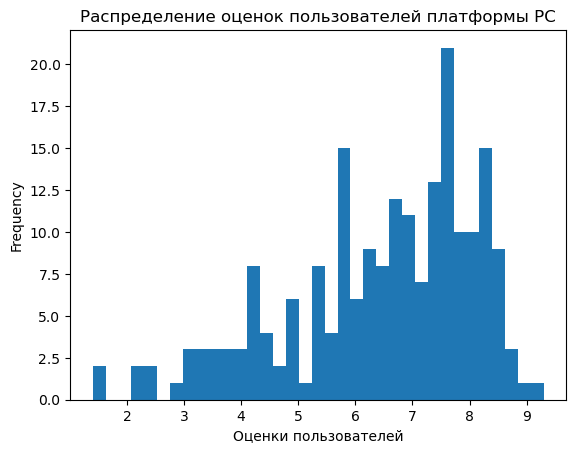

In [56]:
# PC
pc_score.plot(kind = 'hist', bins = 35, title = 'Распределение оценок пользователей платформы PC')
plt.xlabel('Оценки пользователей')
plt.show()

Предварительно по гистаграммам можно сделать вывод, что пользователи PC чаще ставят более высокие оценки, чем пользователи XOne. Данные для Xone имеют меньшую скошенность влево по cравнению с данными PC.

Расчитаем дисперсии выборок для корректного определения атрибута equal_var в статистическом тесте и средние значения:

In [57]:
(new_df
 .query('(platform == "XOne" or platform == "PC") and (user_score != "nan")')
 .pivot_table(index = 'platform', values = 'user_score', aggfunc = ['mean', 'var', 'count'])
)

,mean,var,count
,user_score,user_score,user_score
platform,,,
PC,6.43,2.77,206
XOne,6.52,1.91,182


Значения дисперсий отличаются, значит equal_val = False.

In [58]:
alpha = 0.05
results = st.ttest_ind(xone_score, pc_score, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


#### 5.1.1 Вывод

Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Значение p-value равное 0.549 говорит о том, что результаты теста гипотезы могут быть получены случайно с вероятностью 54.9 %. Это очень большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими баллами. По полученным ранее данным о средних значениях PC - 6.43 и XBox - 6.52 в целом можно сделать вывод о схожести средних.

### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

**H0** - cредние пользовательские рейтинги жанров Action и Sports равны

**H1** - cредние пользовательские рейтинги жанров Action и Sports разные

Для проверки выбран критерий p-value, критический уровень статистической значимости принят 0.05.

Перед проверкой гипотез из данных необходимо удалить пропуски:

In [59]:
action_score = new_df.query('(genre == "Action") and (user_score != "nan")')['user_score'].dropna()
sports_score = new_df.query('(genre == "Sports") and (user_score != "nan")')['user_score'].dropna()

print(action_score.isna().sum())
print(sports_score.isna().sum())

0
0


Для понимания типов распределения данных построим гистограммы для каждой выборки.

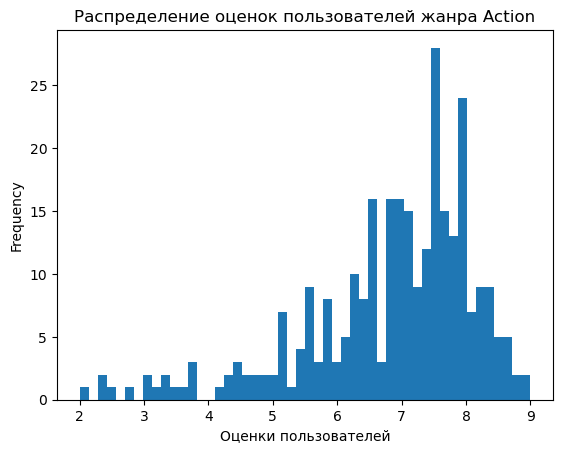

In [60]:
action_score.plot(kind = 'hist', bins = 50, title = 'Распределение оценок пользователей жанра Action')
plt.xlabel('Оценки пользователей')
plt.show()

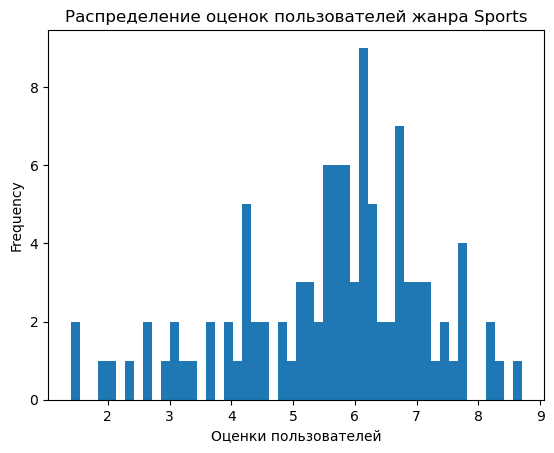

In [61]:
sports_score.plot(kind = 'hist', bins = 50, title = 'Распределение оценок пользователей жанра Sports')
plt.xlabel('Оценки пользователей')
plt.show()

Предварительно по гистаграммам можно сделать вывод, что у жанра Action пользовательские оценки выше, чем у жанра Sports. Данные для Action имеют большую скошенность влево по cравнению с данными Sports.

Расчитаем дисперсии выборок для корректного определения атрибута equal_var в статистическом тесте и средние значения:

In [62]:
(new_df
 .query('(genre == "Action" or genre == "Sports") and (user_score != "nan")')
 .pivot_table(index = 'genre', values = 'user_score', aggfunc = ['mean', 'var', 'count'])
)

,mean,var,count
,user_score,user_score,user_score
genre,,,
Action,6.83,1.79,293
Sports,5.61,2.41,104


Значения дисперсий разные, следовательно equal_val = False.

In [63]:
alpha = 0.05
results = st.ttest_ind(action_score, sports_score, equal_var = False)

print('р-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение 2.7133952427366745e-11
Отвергаем нулевую гипотезу


#### 5.2.1 Вывод

Отвергаем нулевую гипотезу, а значит, средние пользовательские рейтинги жанров Action и Sports разные. Значение p-value близкое к нулю говорит о том, результаты теста гипотезы крайне маловероятно могут быть случайны. Полученные ранее данные о средних значениях жанров Action - 6.83 и Sports - 5.61 подтверждают полученный результат.

## Выводы

По результатам исследования становится понятно, что успешность компьютерных игр зависит сразу от нескольких показателей: платформы, жанра, оценок критиков и пользователей, возрастного рейтинга. 

При планировании кампании на 2017 год следует ориентироваться на платформы: PS4, XOne, WiiU, 3DS и PC и на жанры: Action, Shooter, Role-Playing, Sports и Platform.

Однако при выборе потенциально популярных продуктов и планировании рекламных кампаний следует учитывать особенности и разные предпочтения в каждом регионе. Если в Северной Америке и Европе довольно схожие тенденции развития, то в Японии ситуация сильно отличается. 
 
В случае ориентирования на рынок Северной Америки следует обратить внимание на платформы -  PS4, XOne, 3DS, жанры: Action, Shooter, Role-Playing, Sports и Platform и такие возрастные категории игр, 'M', 'E' и 'T'.

На европейском рынке более успешными могут стать игры на платформах: PS4, XOne, 3DS, PC, жанров: Action, Shooter, Role-Playing, Sports и Platform с возрастными категориями 'M', 'E', 'T' и 'E10+'.

В Японии лучше сделать ставку на платформы: 3DS, PS4 и WiiU и жанр игр: Role-Playing, Action, Platform, Simulation и Misc с возрастной категорией 'E'.